# Amazon S3 自动转换图片格式
Amazon S3 存储桶 新增文件自动触发 AWS Lambda。Lambda 取 S3 文件做转换并存回去 S3 同一个目录下，并增加相应的后缀名。
并且支持通过API Gateway的方式触发对图片进行修改并输出。
本 Lab 使用 Python Pillow 做图片转换，读者可以参考 Pillow 文档进行功能扩展。
## 实现以下功能
### 转换格式
指定以下格式转换，或者选择保留原图格式
* Full Suported image formats: BMP, DIB, EPS, GIF, ICNS, ICO, IM, JPEG, JPEG 2000, MSP, PCX, PNG, PPM, SGI, SPIDER, TGA, TIFF, WebP, XBM
* Read-only formats: BLP, CUR, DCX, DDS, FLI, FLC, FPX, FTEX, GBR, GD, IMT, IPTC/NAA, MCIDAS, MIC, MPO, PCD, PIXAR, PSD, WAL, XPM
* Write-only formats: PALM, PDF, XV Thumbnails  

更多详情参考 Pillow 文档: https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html

### 转换图像大小
* 指定图像宽度和高度进行转换
* 按原图的百分比进行缩放
* 可选择是否保留原图的纵横比 Ratio

### 控制图像质量
* 输出 JPEG，WebP 等图像格式式指定输出的图像质量，即压缩率  
* 输出为 JPEG 渐进式格式

### 其他功能
* 自适应旋转图像。根据原图的 Exif 信息，自动旋转图像
* 添加水印
   
   
## 配置步骤如下：  
1. 新建 S3 桶
新建一个 Amazon S3 的存储桶。用于存放上传的文件和转换后的文件。如果是已有存储桶，可以忽略本步骤。

2. 创建 IAM 角色
创建一个 IAM Role 给 Lambda 运行使用，具有读写 S3 的权限和写 Log 的权限。参考 [policy.js](./policy.js)

3. 创建 Lambda 函数  
创建一个 Lambda 函数，代码见 [lambda_handler.py](./lambda_handler.py)
设置运行环境为 Python3.7，运行内存 256MB，运行超时时间 5 分钟。  

4. 设置 Lambda 环境变量  
该 Lambda 函数引用了以下的环境变量作为转换方式的配置，请配置以下的环境变量，可参考以下值配置：  
    * `preserv_original_format = False`   
    True: 自动检测并保留原图格式和文件后缀
    False: 转换图像格式为以下格式  
    * `convert_format = 'WebP'`  
    转换的目标图像格式  
    * `convert_postfix = '.webp'`  
    转换后的图像文件后缀  
    * `resize_feature = 'Disable'`  
    Disable: 不转换大小   
    Percentile: 基于以下百分比转换大小，并保持纵横比    
    FixSize: 基于以下指定大小来转换，并保持纵横比   
    PercentileNoRatio: 严格按以下百分比转换大小，不保持纵横比   
    FixSizeNoRatio: 严格按以下指定大小来转换，不保持纵横比  
    * `resize_Percentile_w = 0.5`  
    宽度百分比大小 0-1 值  
    * `resize_Percentile_h = 0.5`  
    高度百分比大小 0-1 值  
    * `resize_FixSize_w = 640`  
    指定宽度，像素  
    * `resize_FixSize_h = 640`  
    指定高度，像素  
    * `save_quality = 95` 
    输出的图像质量，即压缩率，针对 JPEG, WebP 等支持 quality 参数的格式，值 0-100，网页展示用可设置 80  
    * `jpeg_progressive = True`  
    是否启用 JPEG 的渐进式格式  
    * `auto_orientation = True`  
    是否启用基于图像 Exif 信息的，自适应旋转功能  
    如果启用，但图像 Exif 中没有 Orientation 信息，则该功能不生效  
    * `watermarktext = Text`
    如果为空，则不添加水印，否则讲Text作为水印添加到相应位置
    * `watermarkposition = Bottom`
    Bottom: 正下方
    Top:正上方
    BottomLeft：左下方
    BottomRight：右下方
    TopLeft：左上方
    TopRight：右上方
    
  
以下为环境变量配置界面示例：  
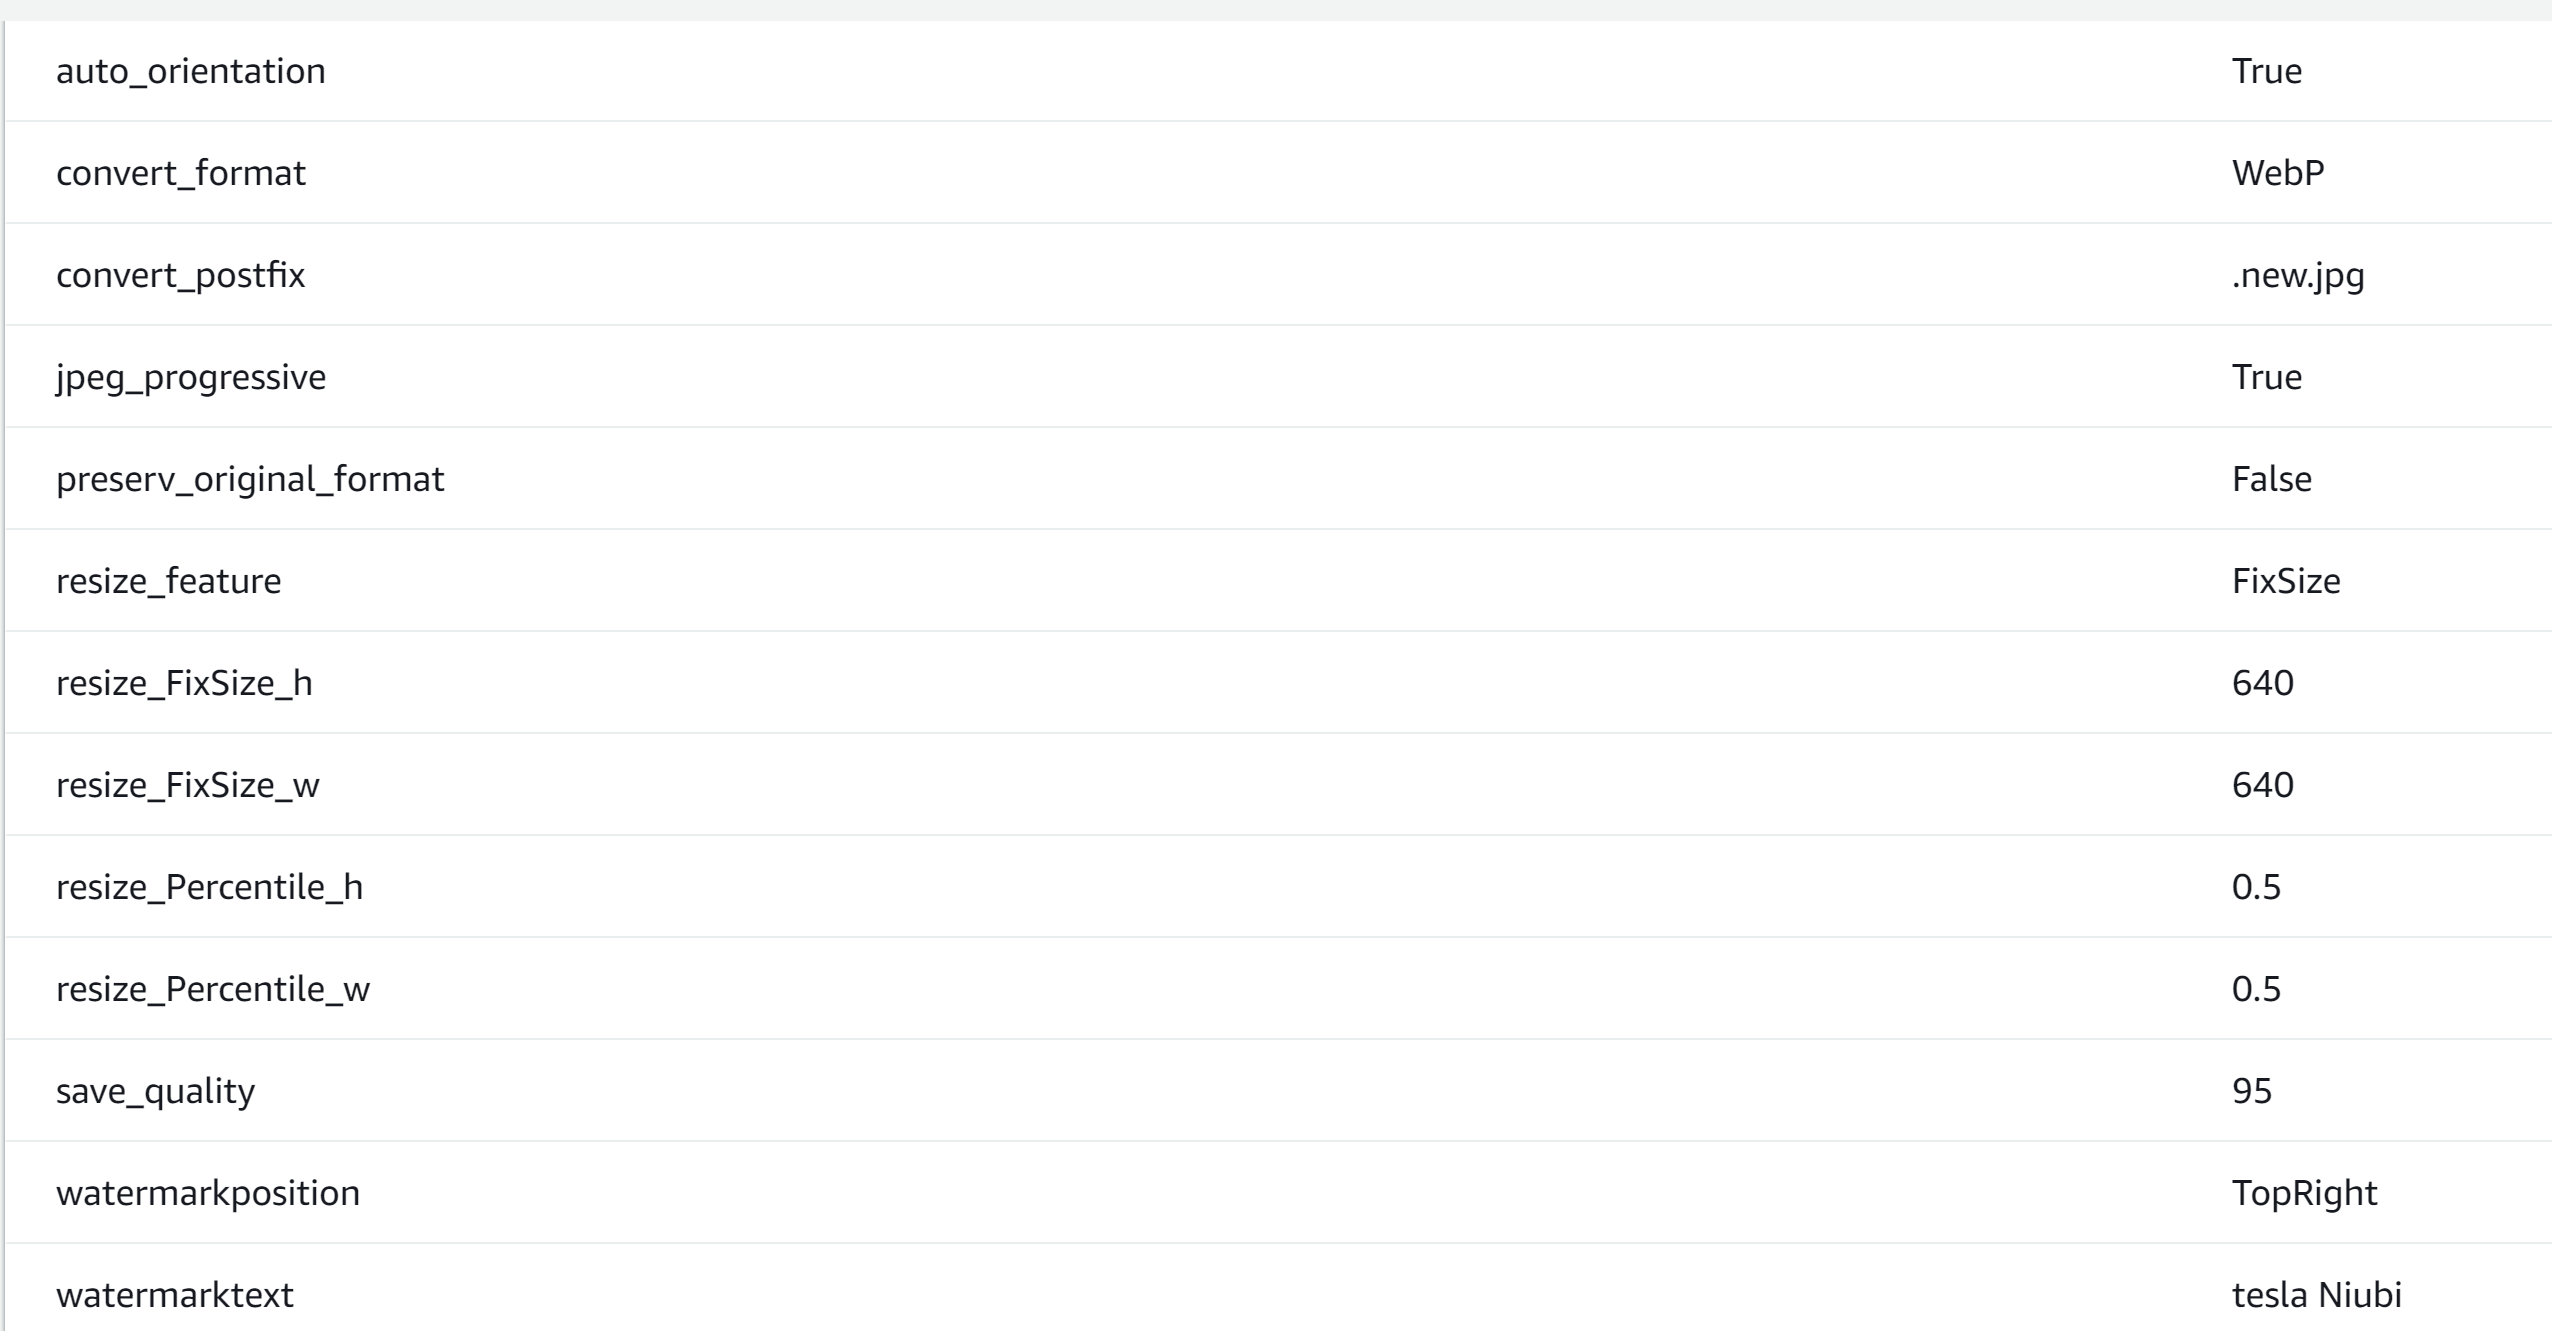
  
### 配置依赖的层（Pillow包）

可以采用本Lab准备好的包：
[python-pillow.zip](./python-pillow-6.2.1.zip)  

* 创建 Lambda Layer  
在 Lambda 界面，左侧菜单 “层”（Layer），创建层。  
上传 python-pillow.zip 文件，并标注一下兼容运行时为 Python 3.7  
  
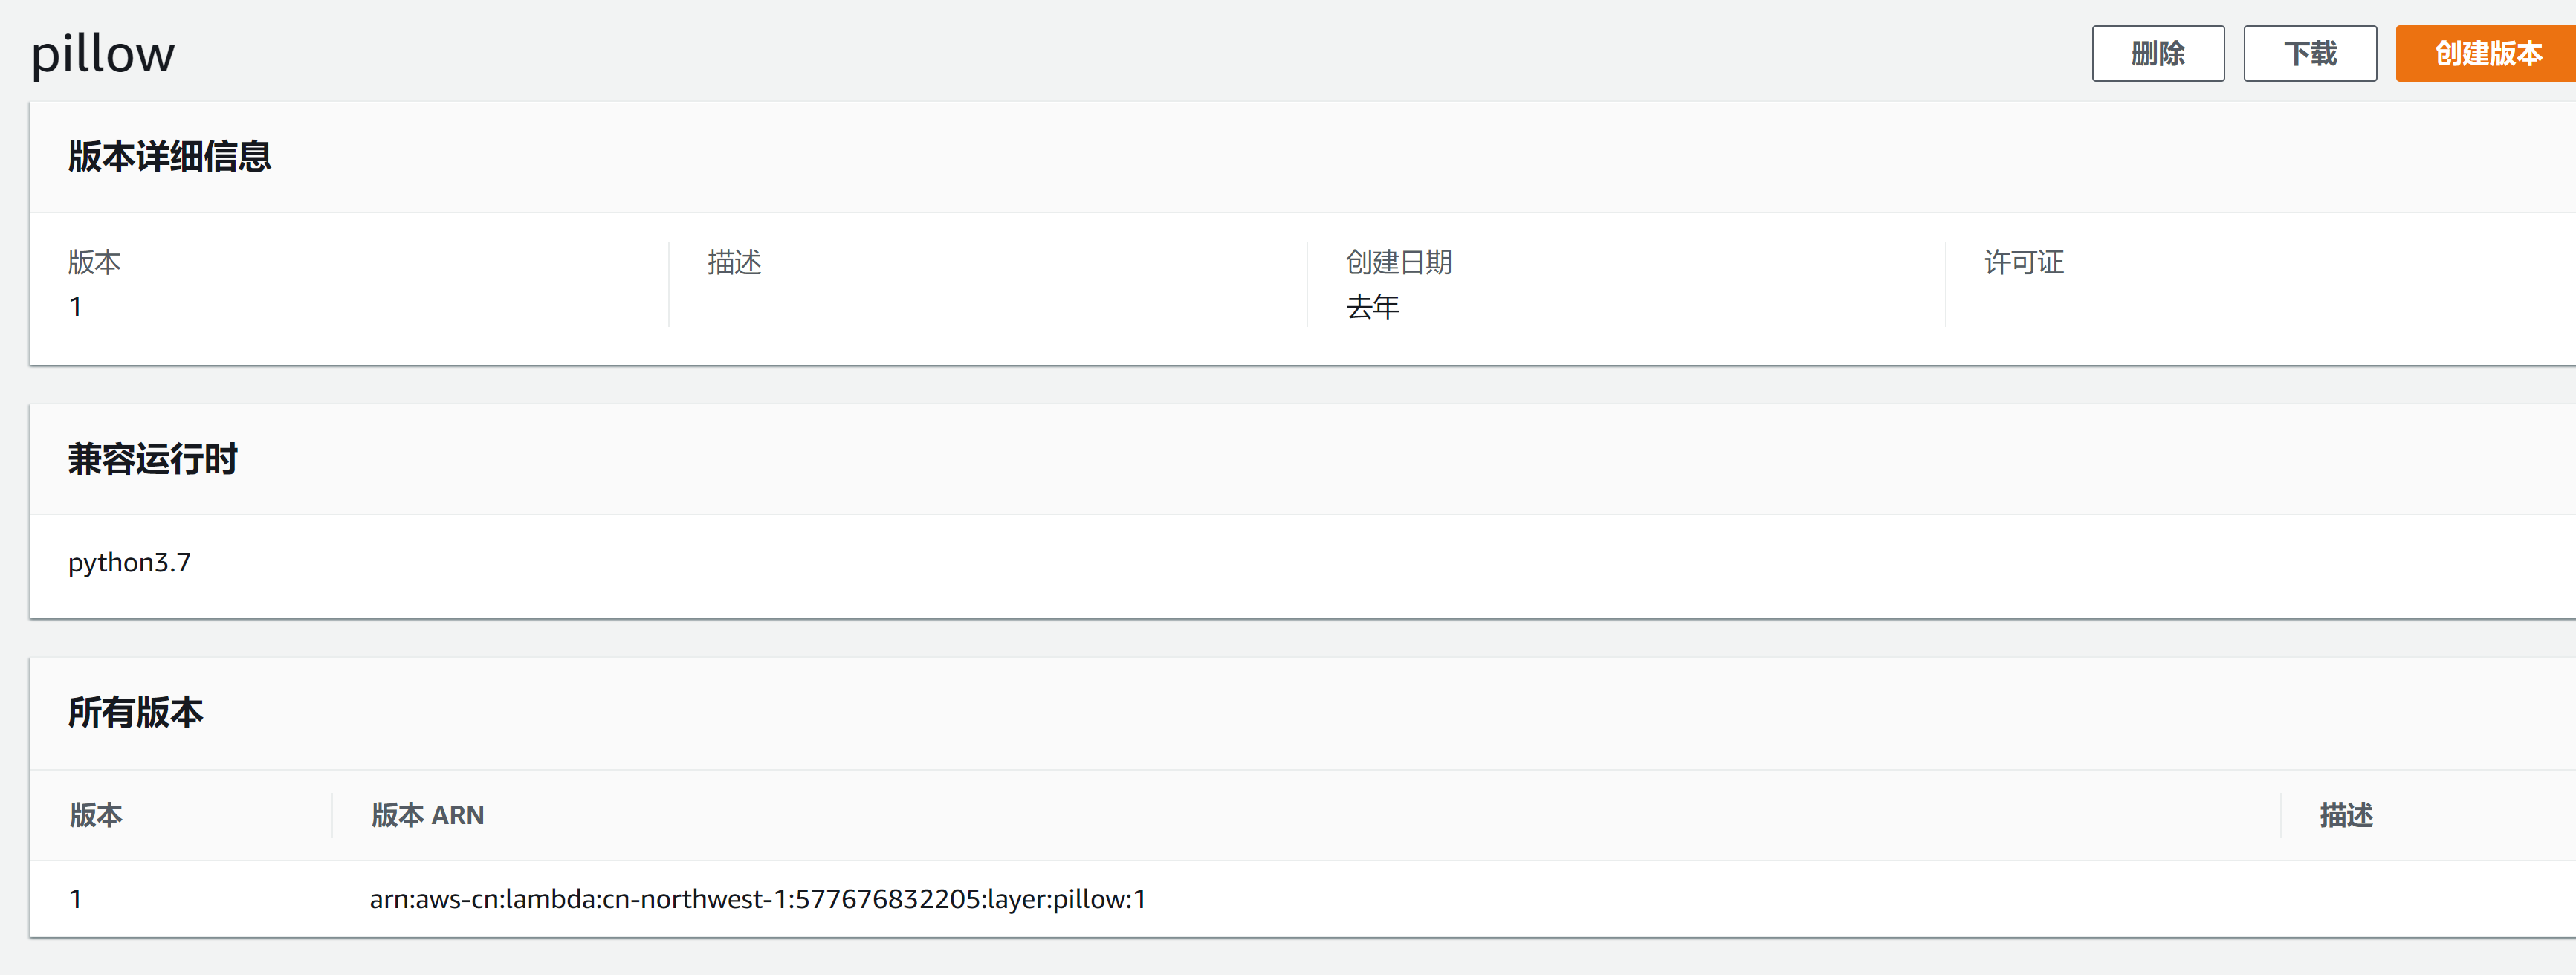

* 将 Lambda 函数关联 Layer  
  进入刚才新建的 Lambda 函数界面，将函数关联刚才创建的层  

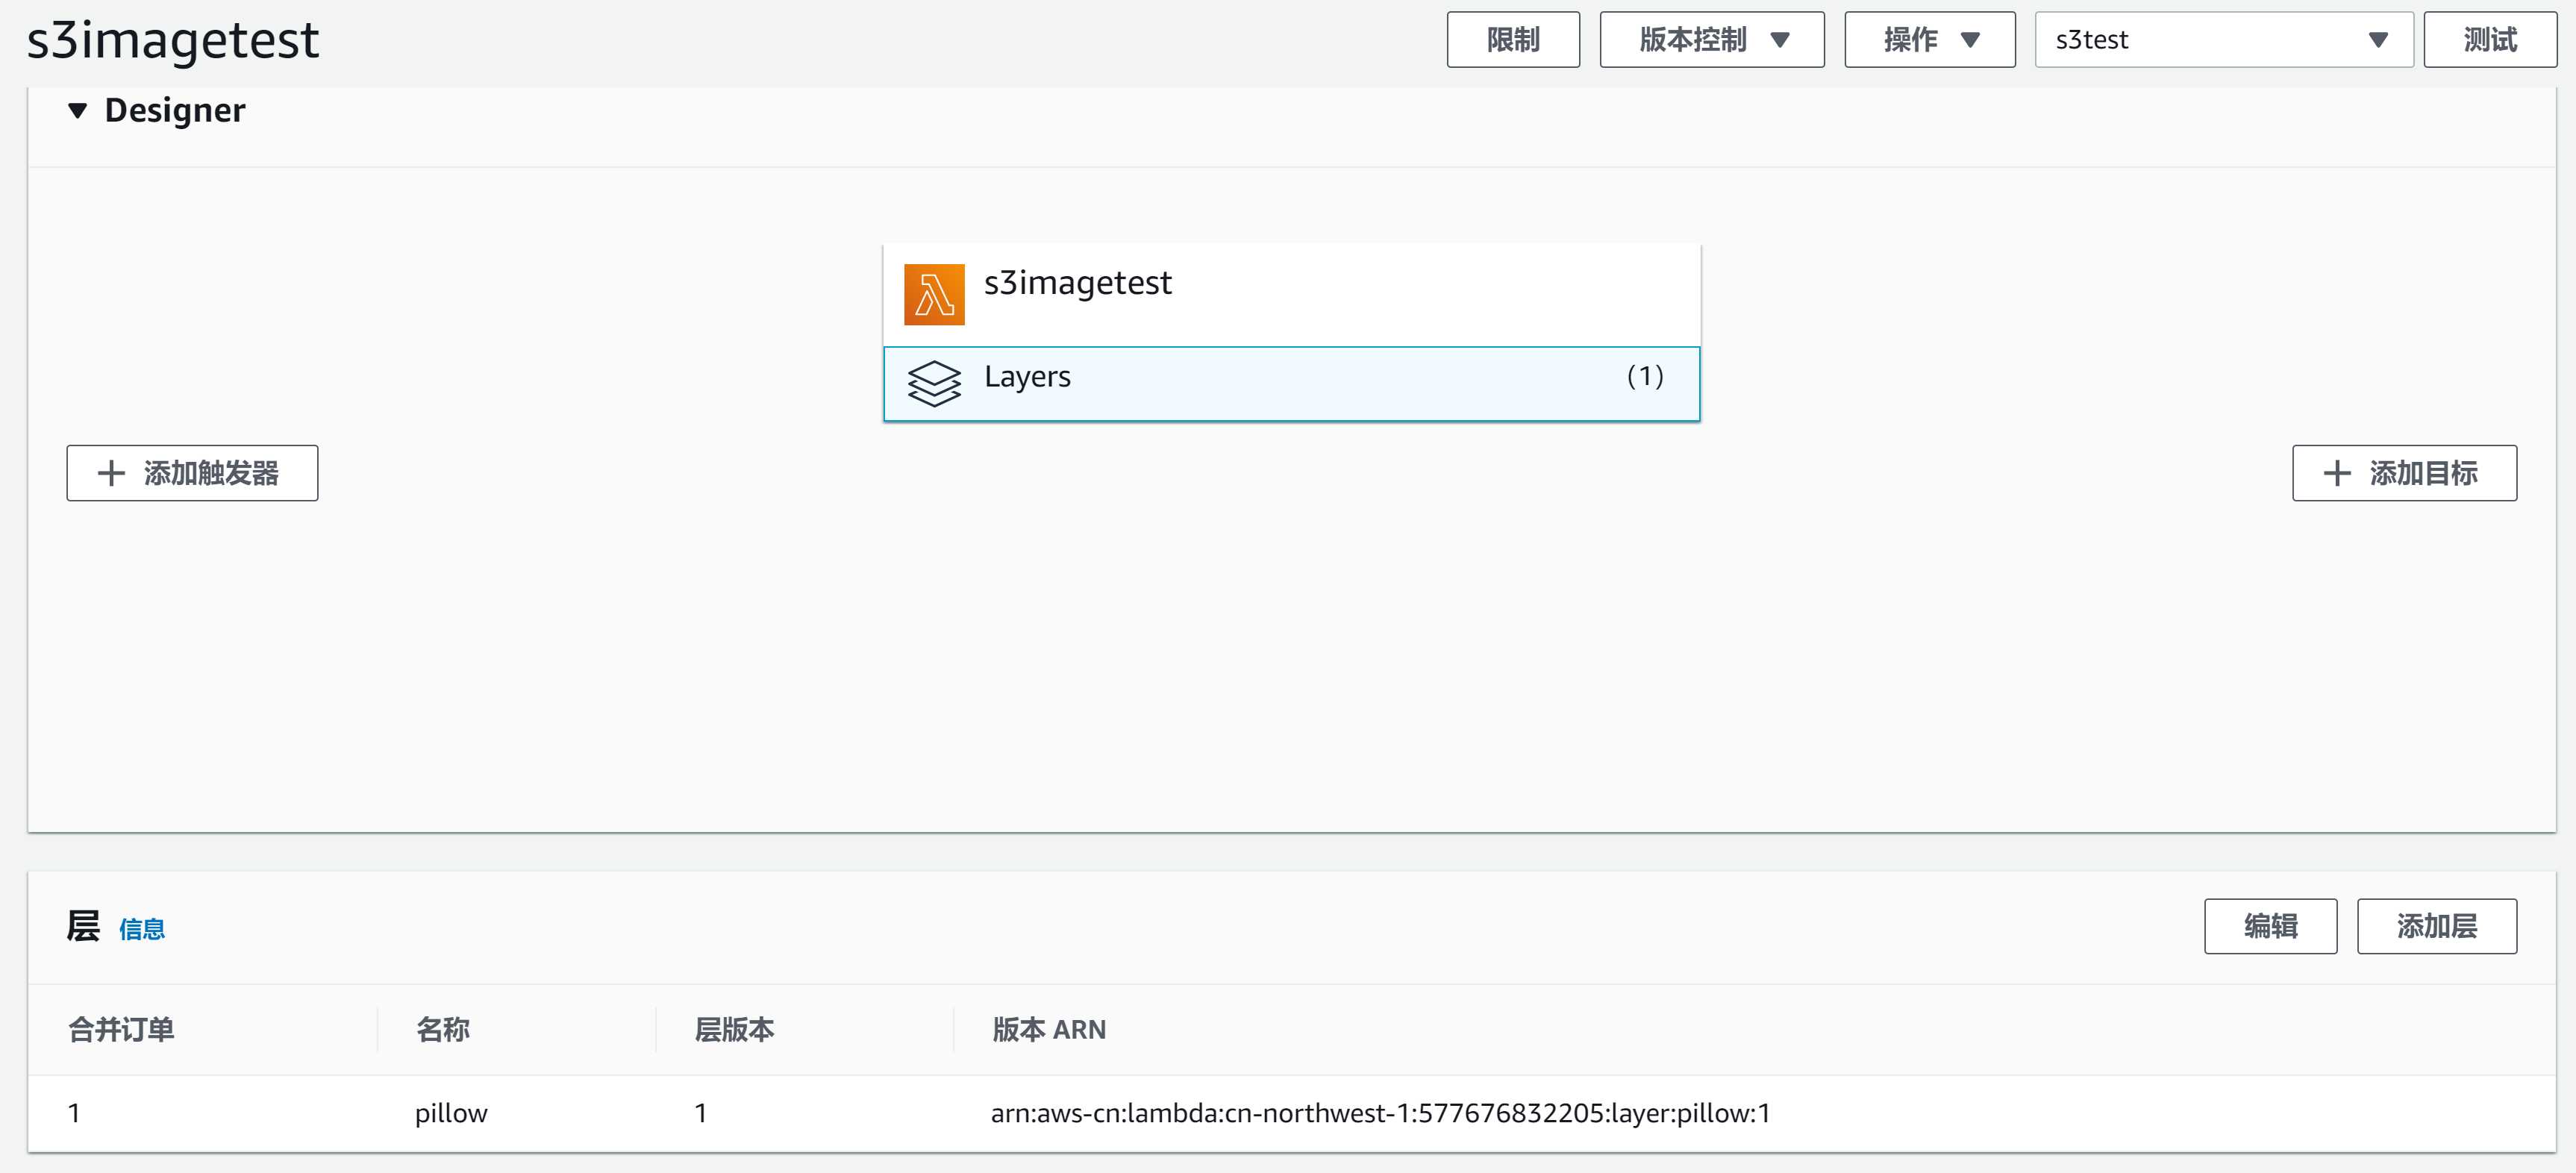

更多关于如何创建和管理层，可以参见：  
https://aws.amazon.com/cn/blogs/china/use-aws-lambda-layer-function/
https://docs.aws.amazon.com/lambda/latest/dg/configuration-layers.html

### 设置 S3 触发 Lambda
* 设置 S3 触发 Lambda  
在 Lambda 函数界面点击“添加触发器”，选择 S3，并选择 S3 桶，对 S3 ”新增“ 文件进行触发。  
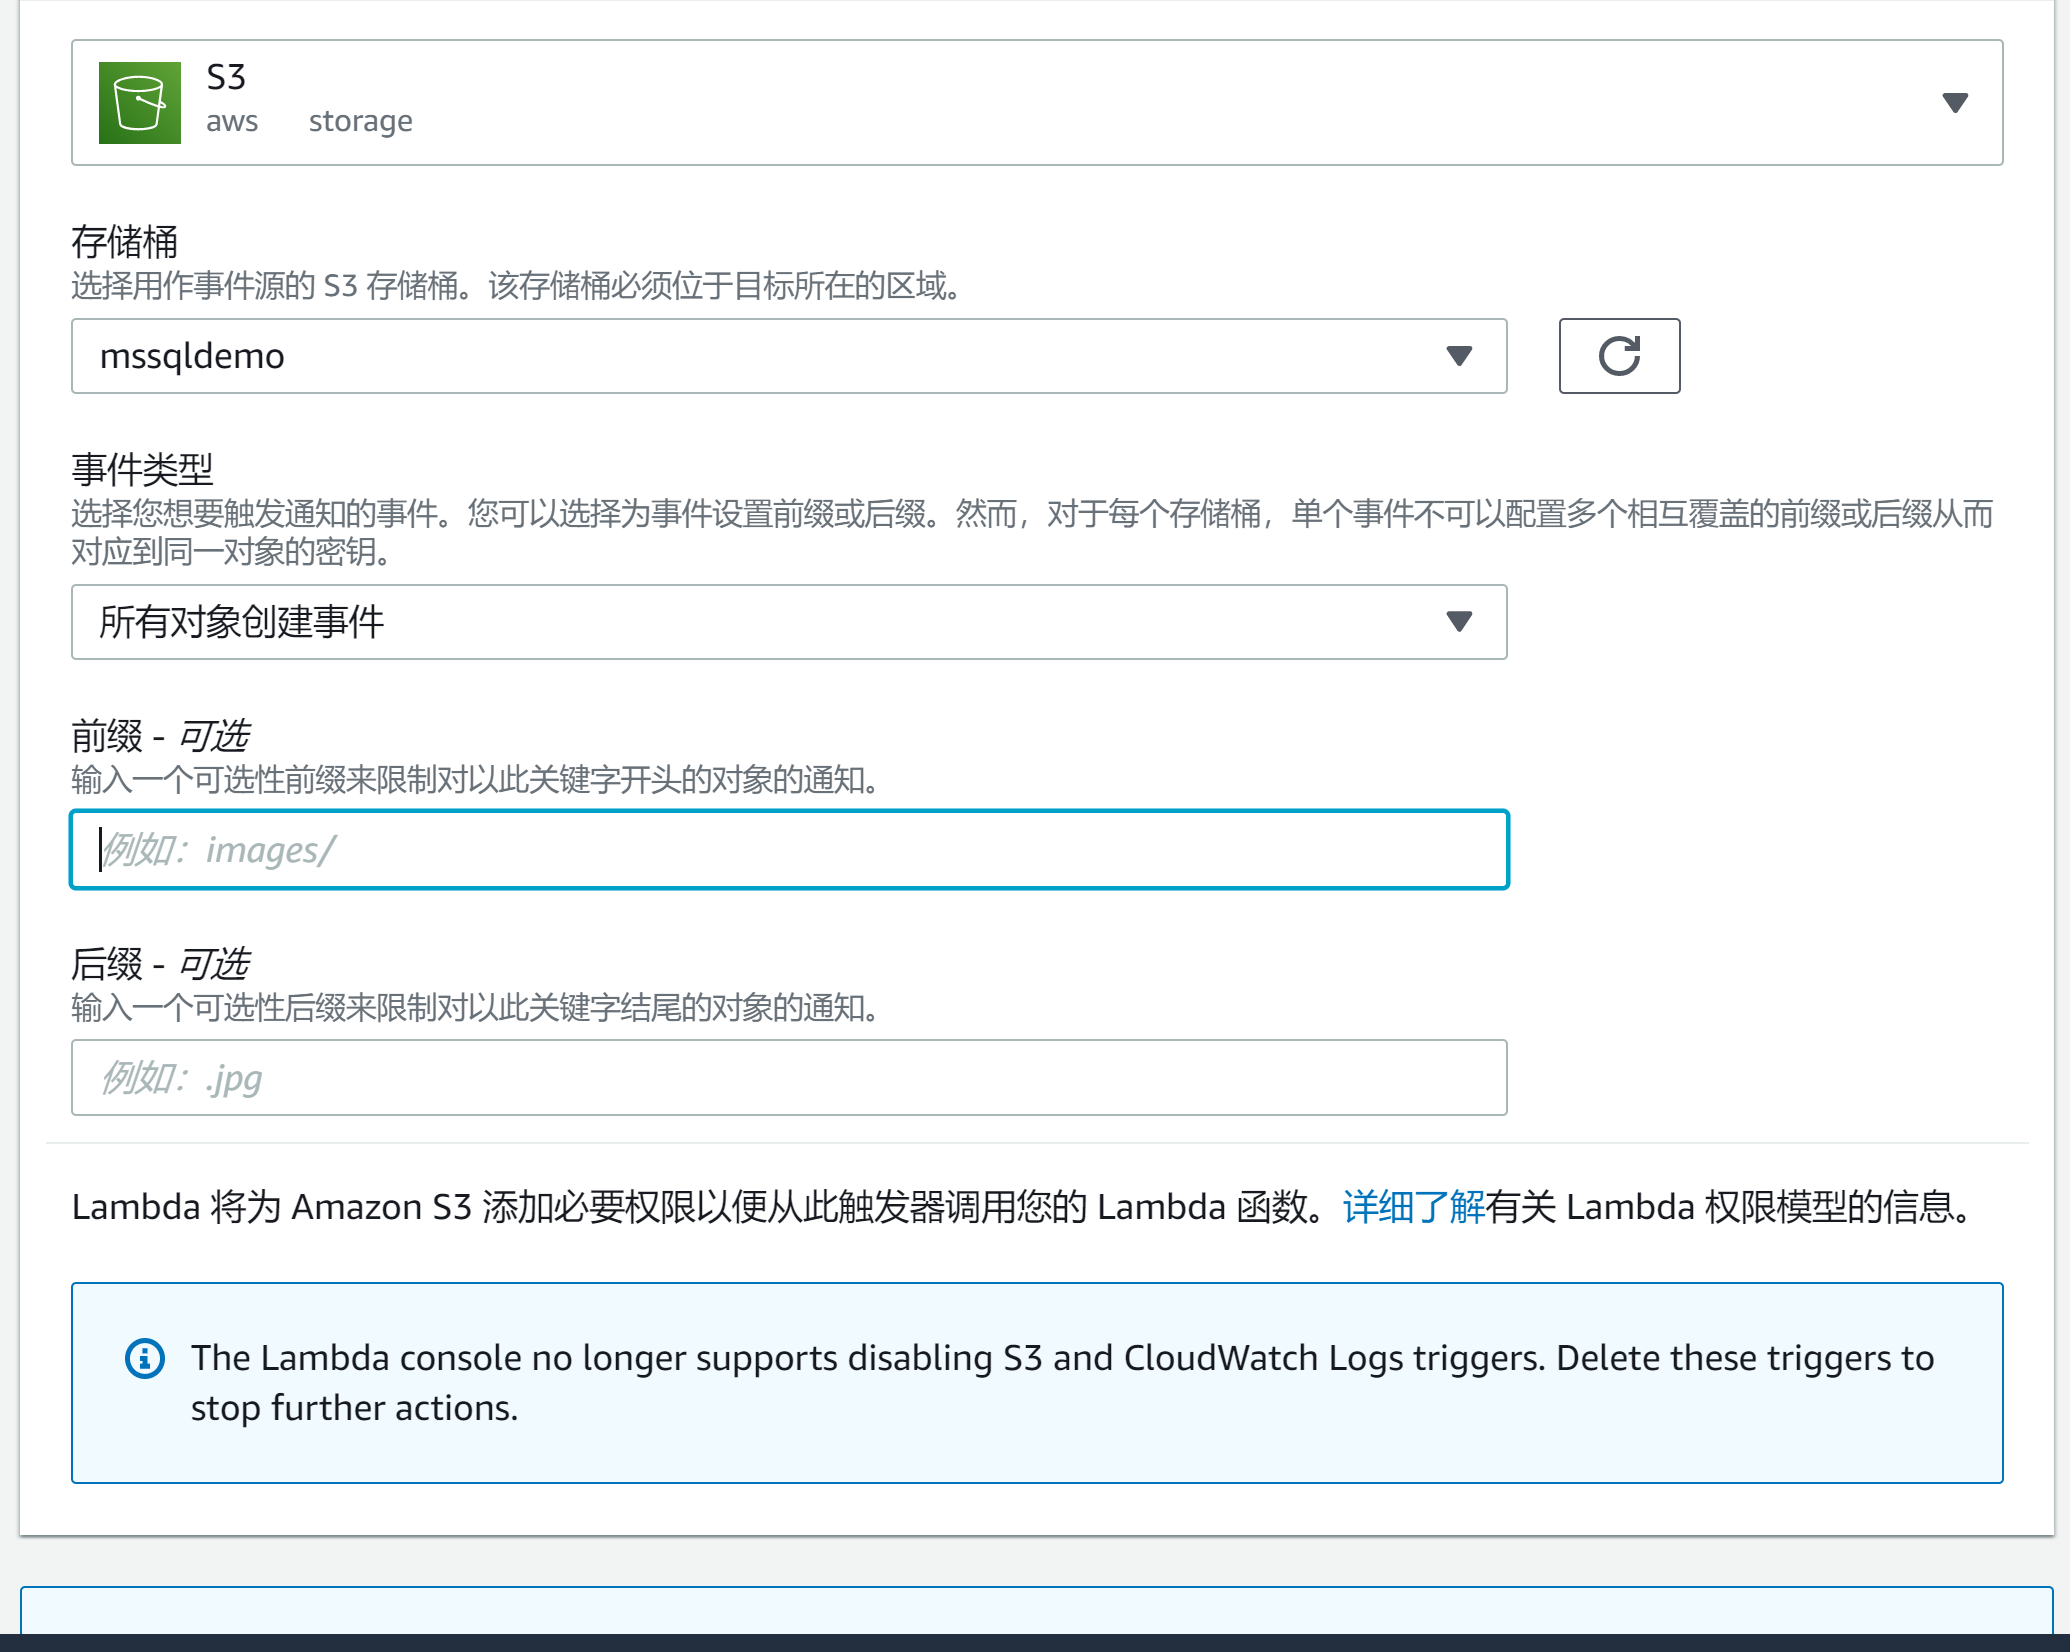
  
### 测试上传文件  
尝试调整环境变量中各种参数：  
* 上传 JPG 文件转换格式为 WebP, 
* 保留原 JPG 格式，只改变大小为指定大小 640*640，保留纵横比  
* 转换格式以及改变大小，并且不保持纵横比  
* 添加水印

